In [27]:
import pandas as pd
import numpy as np
import sqlite3

# 生成更真实的模拟数据
num_students = 1000
courses = ["高等数学", "线性代数", "数据结构", "操作系统", "计算机网络", "数据库原理", "概率统计"]

# 为每个学生生成唯一课程组合
data = []
for student_id in range(num_students):
    sid = f"2023{student_id:04d}"
    # 每个学生随机选5-7门不重复课程
    selected_courses = np.random.choice(courses, size=np.random.randint(5,8), replace=False)
    for course in selected_courses:
        score = np.clip(np.random.normal(loc=75, scale=15), 0, 100).astype(int)
        data.append([sid, course, score])

df = pd.DataFrame(data, columns=["学号", "科目", "成绩"])
df.to_csv("grades.csv", index=False)

df.head()

,学号,科目,成绩
0,20230000,数据库原理,69
1,20230000,线性代数,81
2,20230000,计算机网络,76
3,20230000,概率统计,81
4,20230000,数据结构,71


In [28]:
# 存入SQLite数据库
conn = sqlite3.connect('grades.db')
df.to_sql('student_grades', conn, index=False, if_exists='replace')
conn.close()

In [29]:
# 纯Python版本  
subject_avg_py = df.groupby('科目')['成绩'].mean().round(1)  

In [30]:
# SQL版本  
conn = sqlite3.connect('grades.db')  
subject_avg_sql = pd.read_sql("""  
    SELECT 科目, ROUND(AVG(成绩),1) AS 平均分  
    FROM student_grades  
    GROUP BY 科目  
""", conn)  

In [31]:
print("科目平均分对比:")  
print("Python:\n", subject_avg_py)  
print("SQL:\n", subject_avg_sql.set_index('科目')['平均分']) 

科目平均分对比:
Python:
 科目
操作系统     74.9
数据库原理    74.5
数据结构     74.2
概率统计     74.3
线性代数     74.5
计算机网络    73.4
高等数学     74.0
Name: 成绩, dtype: float64
SQL:
 科目
操作系统     74.9
数据库原理    74.5
数据结构     74.2
概率统计     74.3
线性代数     74.5
计算机网络    73.4
高等数学     74.0
Name: 平均分, dtype: float64


In [32]:
import matplotlib.pyplot as plt  

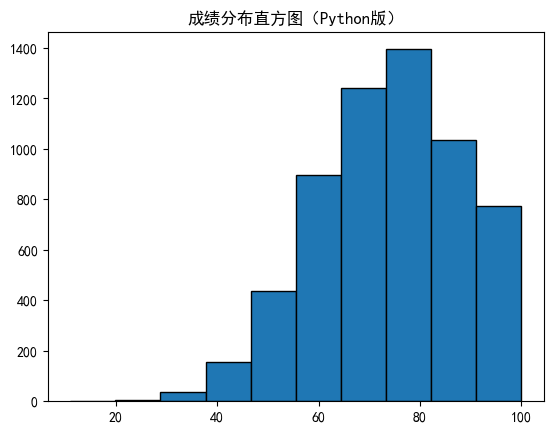

In [33]:
# 纯Python版本  
plt.hist(df['成绩'], bins=10, edgecolor='black')  
plt.title('成绩分布直方图（Python版）')  
plt.savefig('grade_dist_py.png')  

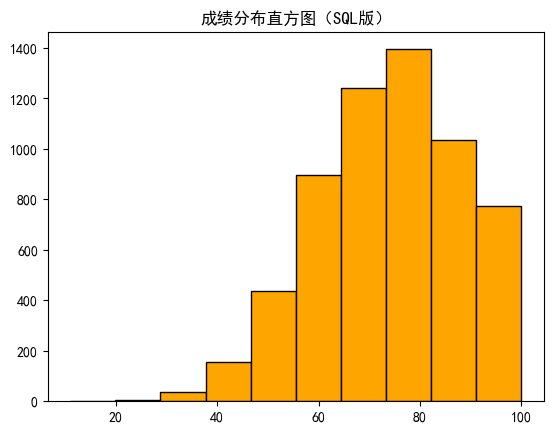

In [34]:
# SQL版本  
grades_sql = pd.read_sql("SELECT 成绩 FROM student_grades", conn)['成绩']  
plt.hist(grades_sql, bins=10, color='orange', edgecolor='black')  
plt.title('成绩分布直方图（SQL版）')  
plt.savefig('grade_dist_sql.png')  

In [35]:
# 纯Python版本  
def analyze_student_py(student_id):  
    student_data = df[df['学号'] == student_id]  
    return {  
        '平均分': student_data['成绩'].mean(),  
        '最高分': student_data['成绩'].max(),  
        '最低分': student_data['成绩'].min()  
    }  

In [36]:
# SQL版本  
def analyze_student_sql(student_id):  
    query = f"""  
    SELECT  
        AVG(成绩) AS 平均分,  
        MAX(成绩) AS 最高分,  
        MIN(成绩) AS 最低分  
    FROM student_grades  
    WHERE 学号 = '{student_id}'  
    """  
    return pd.read_sql(query, conn).iloc[0].to_dict()  

In [37]:
sample_id = df.iloc[0]['学号']  
print("学生分析对比:")  
print("Python:", analyze_student_py(sample_id))  
print("SQL:", analyze_student_sql(sample_id))  

学生分析对比:
Python: {'平均分': 74.5, '最高分': 81, '最低分': 69}
SQL: {'平均分': 74.5, '最高分': 81.0, '最低分': 69.0}
